# NAME: ANURAG MISHRA
# SIC NO: 20BCED17
# BRANCH: CEN

# Part A: Data pre-processing

# Step 1: Importing the libraries

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Importing the datasets

In [57]:
movies=pd.read_csv('movies.csv',usecols=['movieId','title'])
ratings=pd.read_csv('ratings.csv',usecols=['userId', 'movieId', 'rating'])

In [58]:
movies

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017)
9738,193583,No Game No Life: Zero (2017)
9739,193585,Flint (2017)
9740,193587,Bungo Stray Dogs: Dead Apple (2018)


In [59]:
ratings

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


In [60]:
users = len(ratings.userId.unique())
items = len(ratings.movieId.unique())
print('There are {} unique users and {} unique movies in this data set'.format(users, items))

There are 610 unique users and 9724 unique movies in this data set


# Step 3: Visualising the dataset

# 1. Plot the counts of each rating

In [61]:
# we first need to get the counts of each rating from ratings data
ratings_count = pd.DataFrame(ratings.groupby('rating').size(), columns=['count'])
total_count = users*items
zero_count = total_count - ratings.shape[0]
ratings_count = ratings_count.append(pd.DataFrame({'count': zero_count}, index=[0.0]),).sort_index()
ratings_count['log_count'] = np.log(ratings_count['count'])

ratings_count

,count,log_count
0.0,5830804,15.578665
0.5,1370,7.222566
1.0,2811,7.941296
1.5,1791,7.490529
2.0,7551,8.929435
2.5,5550,8.621553
3.0,20047,9.905835
3.5,13136,9.483112
4.0,26818,10.196829
4.5,8551,9.053804


Text(0, 0.5, 'number of ratings')

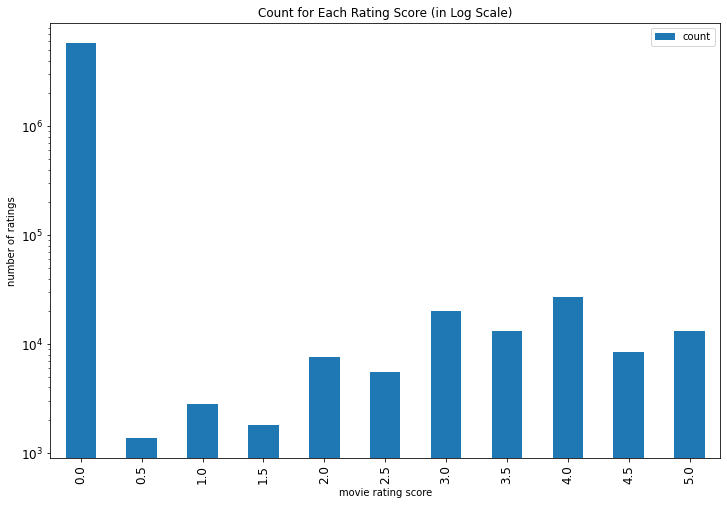

In [82]:
ax = ratings_count[['count']].reset_index().rename(columns={'index': 'rating score'}).plot(
    x='rating score', y='count', kind='bar', figsize=(12, 8), title='Count for Each Rating Score (in Log Scale)',
    logy=True, fontsize=12, )
    
ax.set_xlabel("movie rating score")
ax.set_ylabel("number of ratings")

# 2. Plot rating frequency of all movies

In [63]:
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [64]:
movies_count = pd.DataFrame(ratings.groupby('movieId').size(), columns=['count'])
movies_count.head()

,count
movieId,
1,215
2,110
3,52
4,7
5,49


Text(0, 0.5, 'number of ratings')

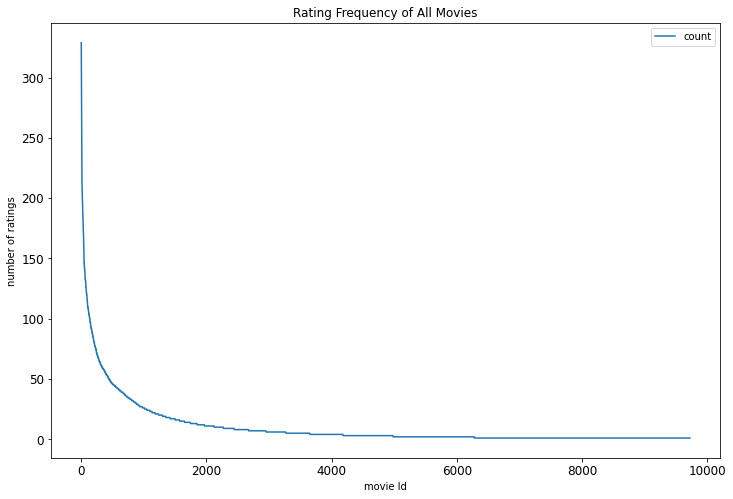

In [84]:
ax = movies_count \
    .sort_values('count', ascending=False) \
    .reset_index(drop=True) \
    .plot( figsize=(12, 8), title='Rating Frequency of All Movies', fontsize=12 )

ax.set_xlabel("movie Id")
ax.set_ylabel("number of ratings")

# 3. Plot rating frequency of all movies in log scale

Text(0, 0.5, 'number of ratings (log scale)')

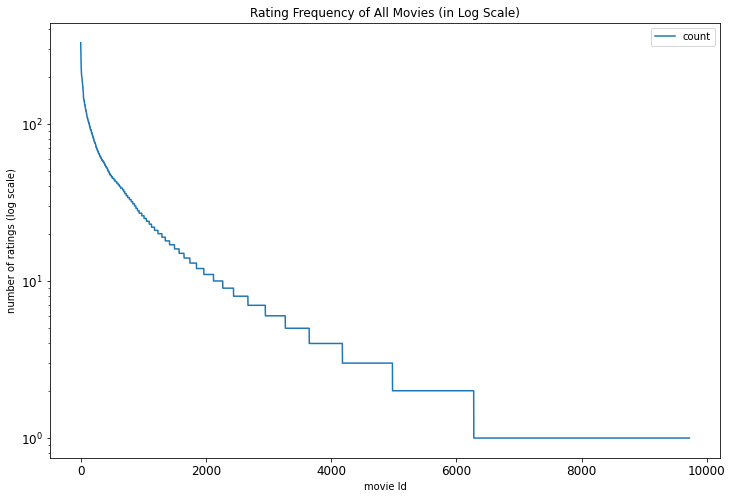

In [85]:
ax = movies_count \
    .sort_values('count', ascending=False) \
    .reset_index(drop=True) \
    .plot( figsize=(12, 8), title='Rating Frequency of All Movies (in Log Scale)', fontsize=12, logy=True )

ax.set_xlabel("movie Id")
ax.set_ylabel("number of ratings (log scale)")

In [67]:
movies_count['count'].quantile(np.arange(1, 0.6, -0.05))

1.00    329.0
0.95     47.0
0.90     27.0
0.85     17.0
0.80     12.0
0.75      9.0
0.70      7.0
0.65      5.0
Name: count, dtype: float64

# Step 4: Flitering the dataset

# 1. Filtering the unpopular movies

In [91]:
popularity_thres = 50
popular_movies = list(set(movies_count.query('count >= @popularity_thres').index))
ratings_drop_movies = ratings[ratings.movieId.isin(popular_movies)]

print('shape of original ratings data: ', ratings.shape)
print('shape of ratings data after dropping unpopular movies: ', ratings_drop_movies.shape)

shape of original ratings data:  (100836, 3)
shape of ratings data after dropping unpopular movies:  (41360, 3)


In [69]:
users_count = pd.DataFrame(ratings_drop_movies.groupby('userId').size(), columns=['count'])
users_count.head()

,count
userId,
1,117
2,15
3,6
4,84
5,34


Text(0, 0.5, 'number of ratings')

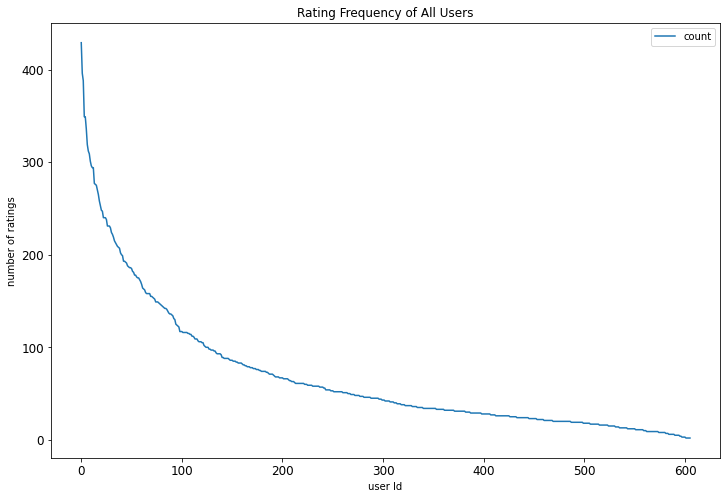

In [70]:
# plot rating frequency of all movies
ax = users_count \
    .sort_values('count', ascending=False) \
    .reset_index(drop=True) \
    .plot( figsize=(12, 8), title='Rating Frequency of All Users', fontsize=12)

ax.set_xlabel("user Id")
ax.set_ylabel("number of ratings")

In [71]:
users_count['count'].quantile(np.arange(1, 0.5, -0.05))

1.00    429.00
0.95    223.50
0.90    166.00
0.85    134.25
0.80    105.00
0.75     85.00
0.70     74.00
0.65     62.25
0.60     56.00
0.55     48.00
Name: count, dtype: float64

# 2. Filtering the inactive users.

In [72]:
ratings_thres = 50
active_users = list(set(users_count.query('count >= @ratings_thres').index))
ratings_drop_users = ratings_drop_movies[ratings_drop_movies.userId.isin(active_users)]

print('shape of original ratings data: ', ratings.shape)
print('shape of ratings data after dropping both unpopular movies and inactive users: ', ratings_drop_users.shape)

shape of original ratings data:  (100836, 3)
shape of ratings data after dropping both unpopular movies and inactive users:  (32999, 3)


# Part B: Building the KNN model for collaborative filtering

# Step 1: Reshaping  the data 

In [86]:
# create movie-user matrix
movie_user_mat = ratings_drop_users.pivot(index='movieId', columns='userId', values='rating').fillna(0)

# create mapper from movie title to index
movie_to_idx = { movie: i for i, movie in enumerate(list(movies.set_index('movieId').loc[movie_user_mat.index].title)) }

# transform matrix to scipy sparse matrix
from scipy.sparse import csr_matrix
movie_user_mat_sparse = csr_matrix(movie_user_mat.values)

# Step 2: Fitting the Model

In [87]:
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20,p=2)
model_knn.fit(movie_user_mat_sparse)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=20)

# Step 3: Testing the model

In [88]:
from fuzzywuzzy import fuzz
import math
import time

def matching(mapper, fav_movie):
    match_tuple = []
    
    for title, idx in mapper.items():
        ratio = fuzz.ratio(title.lower(), fav_movie.lower())
        if ratio >= 60:
            match_tuple.append((title, idx, ratio))
    
    match_tuple = sorted(match_tuple, key=lambda x: x[2])[::-1]
    if not match_tuple:
        print('Oops! No match is found')
        return
    else:
        print('Found possible matches in our database: {0}\n'.format([x[0] for x in match_tuple]))
    return match_tuple[0][1]


def make_recommendation(model_knn, data, mapper, fav_movie, n_recommendations):
    model_knn.fit(data)
    
    print('You have input movie:', fav_movie)
    idx = matching(mapper, fav_movie)
    
    distances, indices = model_knn.kneighbors(data[idx], n_neighbors=n_recommendations+1)
    
    raw_recommends = sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())), key=lambda x: x[1])[:0:-1]
    
    reverse_mapper = {v: k for k, v in mapper.items()}
    
    print('Recommendations for {} are as follows:\n'.format(fav_movie))
    
    for i, (idx, dist) in enumerate(raw_recommends):
        print('{0}: {1}, with distance of {2}'.format(i+1, reverse_mapper[idx], dist))

In [89]:
my_favorite = 'Iron man'

make_recommendation( model_knn=model_knn, data=movie_user_mat_sparse, fav_movie=my_favorite, mapper=movie_to_idx, 
                    n_recommendations=10)

You have input movie: Iron man
Found possible matches in our database: ['Iron Man (2008)']

Recommendations for Iron man are as follows:

1: Batman Begins (2005), with distance of 0.34744154173084363
2: Sherlock Holmes (2009), with distance of 0.3463540530285869
3: Kung Fu Panda (2008), with distance of 0.34323498779508776
4: Inception (2010), with distance of 0.33073992134058794
5: District 9 (2009), with distance of 0.3187720802539473
6: Up (2009), with distance of 0.31706735090314886
7: WALL·E (2008), with distance of 0.27033112296383466
8: Avengers, The (2012), with distance of 0.2610290662950412
9: Avatar (2009), with distance of 0.2599024893009969
10: Dark Knight, The (2008), with distance of 0.24019004841992464


# Part C: Calulate how sparse is the movie-user matrix

In [90]:
# num_entries = total number of entries in the movie-user matrix
num_entries = movie_user_mat.shape[0] * movie_user_mat.shape[1]

# num_zeros = total number of entries with zero values
num_zeros = (movie_user_mat==0).sum(axis=1).sum()

# calculate ratio of number of zeros to number of entries
ratio_zeros = num_zeros / num_entries

print('There is about {:.2%} of ratings in our data is missing'.format(ratio_zeros))

There is about 72.64% of ratings in our data is missing
